In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
election_result_history_df = pd.read_csv(r"E:\IIT CHICAGO\SEMESTER_1\ONLINE SOCIAL NETWORK ANALYSIS\Project Work\DATASETS\1976-2022-house.csv")
Florida_df = election_result_history_df[election_result_history_df["state" ] == "FLORIDA"]
election_result_Florida= Florida_df[Florida_df["district" ] == 26]


In [30]:
Voter_turnout_df = pd.read_csv(r"E:\IIT CHICAGO\SEMESTER_1\ONLINE SOCIAL NETWORK ANALYSIS\Project Work\DATASETS\US_VEP_Turnout_Rates_v1.2.csv")


In [58]:
Demographic_voters_turnout_df = pd.read_csv(r"DATASETS\CPS_Demographic_Turnout_Rates_v1.0.csv")
Demographic_voters_turnout_df.head()

,YEAR,CPS_ADJ_NHWHITE_RATE,CPS_ADJ_NHBLACK_RATE,CPS_ADJ_HISPANIC_RATE,CPS_ADJ_OTHER_RATE,CPS_ADJ_NHWHITE_SHARE,CPS_ADJ_NHBLACK_SHARE,CPS_ADJ_HISPANIC_SHARE,CPS_ADJ_OTHER_SHARE,CPS_UNADJ_NHWHITE_RATE,...,CPS_ADJ_COLLEGE_SHARE,CPS_ADJ_POST_SHARE,CPS_UNADJ_NOHS_RATE,CPS_UNADJ_HS_RATE,CPS_UNADJ_COLLEGE_RATE,CPS_UNADJ_POST_RATE,CPS_UNADJ_NOHS_SHARE,CPS_UNADJ_HS_SHARE,CPS_UNADJ_COLLEGE_SHARE,CPS_UNADJ_POST_SHARE
0,2022,0.5284,0.4064,0.3054,0.3425,0.7388,0.1114,0.0945,0.0553,0.5764,...,0.5616,0.1795,0.2589,0.4045,0.5766,0.7104,0.0356,0.2230,0.5606,0.1808
1,2020,0.7257,0.6563,0.5253,0.5976,0.7124,0.1220,0.1061,0.0595,0.7094,...,0.5582,0.1538,0.4041,0.5546,0.7322,0.8296,0.0458,0.2422,0.5579,0.1541
2,2018,0.5521,0.5131,0.3688,0.3969,0.7326,0.1222,0.0940,0.0512,0.5747,...,0.5659,0.1649,0.2722,0.4208,0.5931,0.7400,0.0422,0.2272,0.5654,0.1652
3,2016,0.6468,0.5986,0.4491,0.4625,0.7363,0.1234,0.0908,0.0495,0.6530,...,0.5572,0.1460,0.3433,0.5155,0.6776,0.8027,0.0508,0.2456,0.5574,0.1462
4,2014,0.4077,0.3638,0.2112,0.2448,0.7692,0.1192,0.0701,0.0415,0.4576,...,0.5491,0.1575,0.2220,0.3393,0.4624,0.6202,0.0510,0.2413,0.5492,0.1585


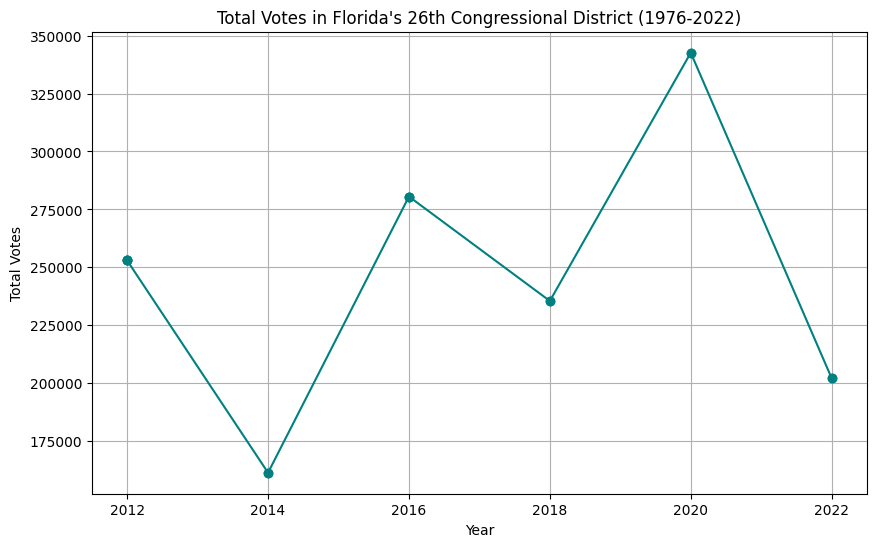

,year,candidatevotes,totalvotes
count,15.000000,15.000000,15.000000
mean,2016.266667,98336.600000,249103.600000
std,3.614784,56334.450169,53926.862647
min,2012.000000,2717.000000,161337.000000
25%,2013.000000,68587.000000,218791.500000
50%,2016.000000,115493.000000,252957.000000
75%,2019.000000,139467.000000,280542.000000
max,2022.000000,177223.000000,342630.000000


In [21]:
import matplotlib.pyplot as plt

# Filter house election data for Florida's 26th congressional district
fl26_data = house_data[(house_data['state_po'] == 'FL') & (house_data['district'] == 26)]

# Basic statistics of candidate votes and total votes for Florida-26
fl26_stats = fl26_data[['year', 'candidatevotes', 'totalvotes']].describe()

# Plot the trend of total votes in Florida's 26th congressional district over time
plt.figure(figsize=(10, 6))
plt.plot(fl26_data['year'], fl26_data['totalvotes'], marker='o', color='teal')
plt.title("Total Votes in Florida's 26th Congressional District (1976-2022)")
plt.xlabel("Year")
plt.ylabel("Total Votes")
plt.grid(True)
plt.show()

fl26_stats


In [22]:
Demographic_voters_turnout_df.rename(columns={'YEAR': 'year'}, inplace=True)
Voter_turnout_df.rename(columns={'YEAR': 'year'}, inplace=True)

# Perform left merge with demographic and VEP turnout datasets to keep all Florida-26 data
fl26_data_merged = (
    election_result_Florida.merge(Demographic_voters_turnout_df, on='year', how='left')
             .merge(Voter_turnout_df, on='year', how='left')
)

# Display merged data structure and some basic statistics
fl26_data_merged_head = fl26_data_merged.head()
fl26_data_merged_stats = fl26_data_merged.describe()

fl26_data_merged_head, fl26_data_merged_stats

(   year    state state_po  state_fips  state_cen  state_ic    office  \
 0  2012  FLORIDA       FL          12         59        43  US HOUSE   
 1  2012  FLORIDA       FL          12         59        43  US HOUSE   
 2  2012  FLORIDA       FL          12         59        43  US HOUSE   
 3  2012  FLORIDA       FL          12         59        43  US HOUSE   
 4  2014  FLORIDA       FL          12         59        43  US HOUSE   
 
    district stage runoff  ...  CPS_UNADJ_NOHS_RATE CPS_UNADJ_HS_RATE  \
 0        26   GEN    NaN  ...                0.380            0.5260   
 1        26   GEN    NaN  ...                0.380            0.5260   
 2        26   GEN    NaN  ...                0.380            0.5260   
 3        26   GEN    NaN  ...                0.380            0.5260   
 4        26   GEN    NaN  ...                0.222            0.3393   
 
   CPS_UNADJ_COLLEGE_RATE  CPS_UNADJ_POST_RATE CPS_UNADJ_NOHS_SHARE  \
 0                 0.6840               0.8140   

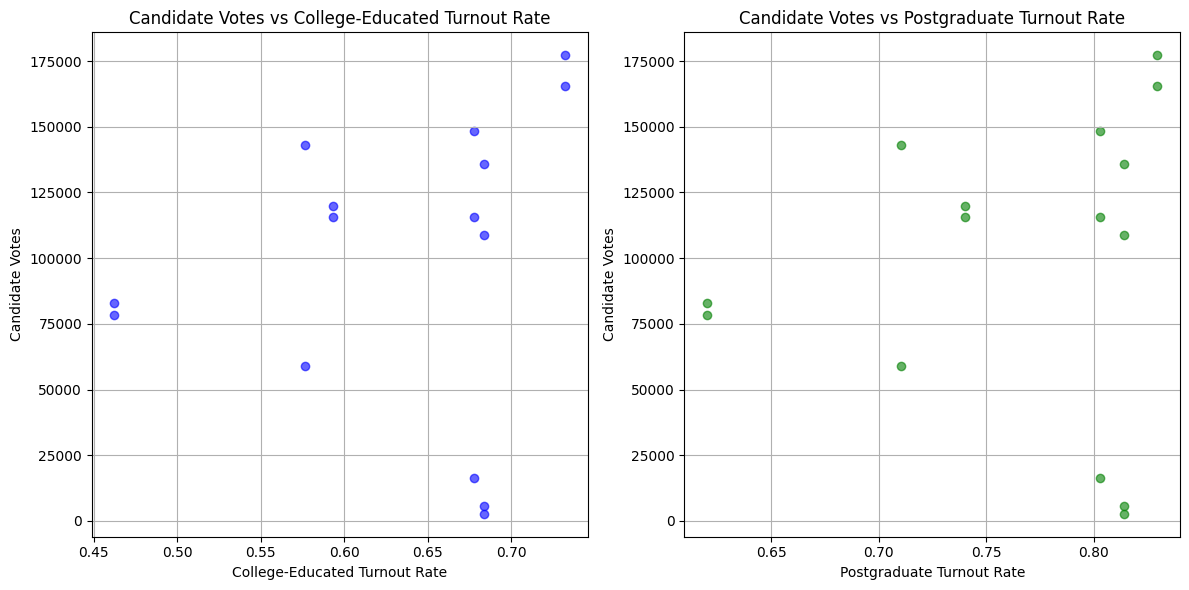

In [23]:
# Plotting demographic factors (e.g., college-educated and postgraduate turnout rates) versus candidate votes

plt.figure(figsize=(12, 6))

# Plot candidate votes vs. college-educated turnout rate
plt.subplot(1, 2, 1)
plt.scatter(fl26_data_merged['CPS_UNADJ_COLLEGE_RATE'], fl26_data_merged['candidatevotes'], color='blue', alpha=0.6)
plt.title("Candidate Votes vs College-Educated Turnout Rate")
plt.xlabel("College-Educated Turnout Rate")
plt.ylabel("Candidate Votes")
plt.grid(True)

# Plot candidate votes vs postgraduate turnout rate
plt.subplot(1, 2, 2)
plt.scatter(fl26_data_merged['CPS_UNADJ_POST_RATE'], fl26_data_merged['candidatevotes'], color='green', alpha=0.6)
plt.title("Candidate Votes vs Postgraduate Turnout Rate")
plt.xlabel("Postgraduate Turnout Rate")
plt.ylabel("Candidate Votes")
plt.grid(True)

plt.tight_layout()
plt.show()


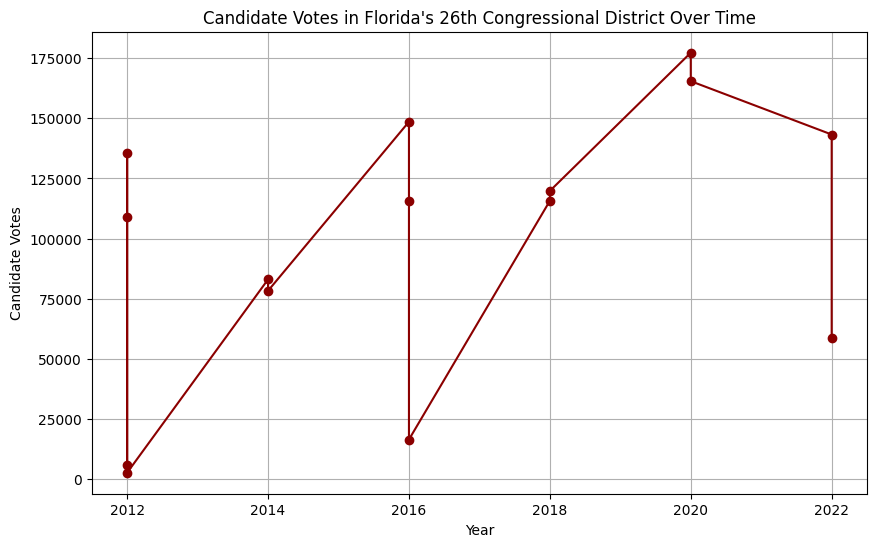

In [24]:
# Line plot of candidate votes over time
plt.figure(figsize=(10, 6))
plt.plot(fl26_data_merged['year'], fl26_data_merged['candidatevotes'], marker='o', color='darkred')
plt.title("Candidate Votes in Florida's 26th Congressional District Over Time")
plt.xlabel("Year")
plt.ylabel("Candidate Votes")
plt.grid(True)
plt.show()


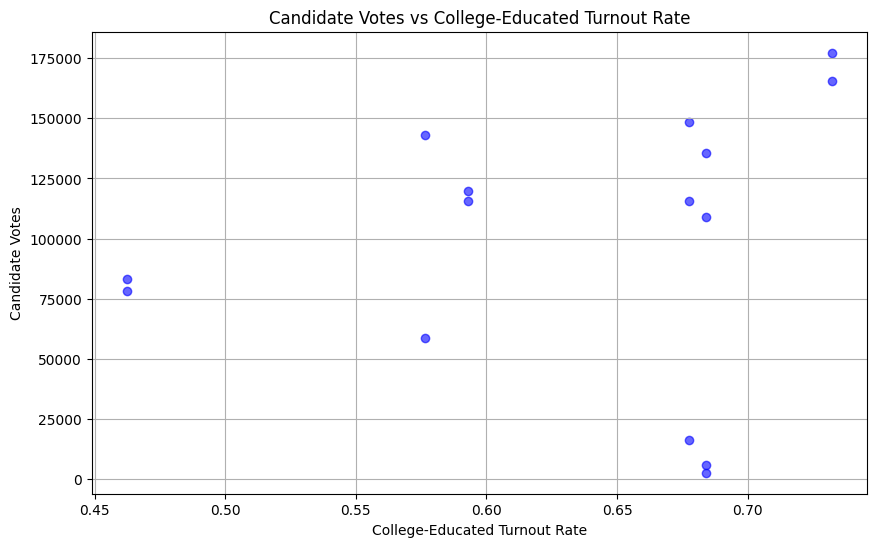

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(fl26_data_merged['CPS_UNADJ_COLLEGE_RATE'], fl26_data_merged['candidatevotes'], color='blue', alpha=0.6)
plt.title("Candidate Votes vs College-Educated Turnout Rate")
plt.xlabel("College-Educated Turnout Rate")
plt.ylabel("Candidate Votes")
plt.grid(True)
plt.show()


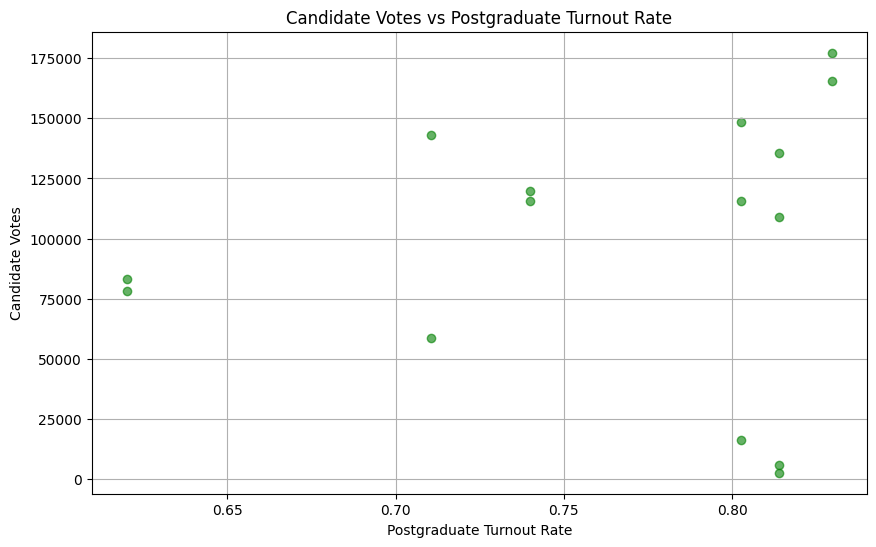

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(fl26_data_merged['CPS_UNADJ_POST_RATE'], fl26_data_merged['candidatevotes'], color='green', alpha=0.6)
plt.title("Candidate Votes vs Postgraduate Turnout Rate")
plt.xlabel("Postgraduate Turnout Rate")
plt.ylabel("Candidate Votes")
plt.grid(True)
plt.show()


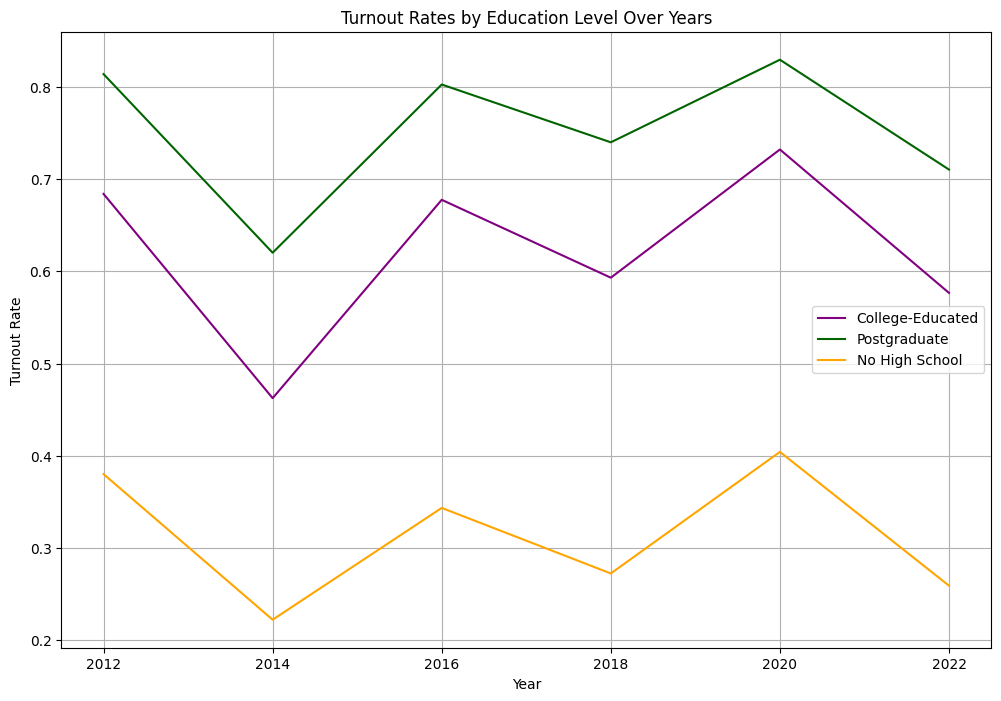

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_COLLEGE_RATE'], label='College-Educated', color='purple')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_POST_RATE'], label='Postgraduate', color='darkgreen')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_NOHS_RATE'], label='No High School', color='orange')
plt.title("Turnout Rates by Education Level Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


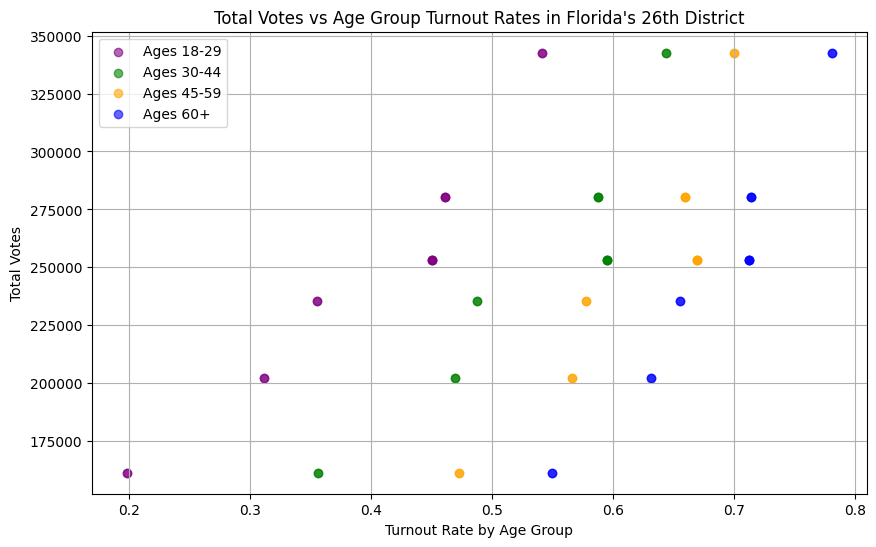

In [39]:
# Plot total votes against turnout rates by age group
plt.figure(figsize=(10, 6))
plt.scatter(fl26_data_merged['CPS_UNADJ_AGE1829_RATE'], fl26_data_merged['totalvotes'], color='purple', label='Ages 18-29', alpha=0.6)
plt.scatter(fl26_data_merged['CPS_UNADJ_AGE3044_RATE'], fl26_data_merged['totalvotes'], color='green', label='Ages 30-44', alpha=0.6)
plt.scatter(fl26_data_merged['CPS_UNADJ_AGE4559_RATE'], fl26_data_merged['totalvotes'], color='orange', label='Ages 45-59', alpha=0.6)
plt.scatter(fl26_data_merged['CPS_ADJ_AGE60_RATE'], fl26_data_merged['totalvotes'], color='blue', label='Ages 60+', alpha=0.6)
plt.title("Total Votes vs Age Group Turnout Rates in Florida's 26th District")
plt.xlabel("Turnout Rate by Age Group")
plt.ylabel("Total Votes")
plt.legend()
plt.grid(True)
plt.show()


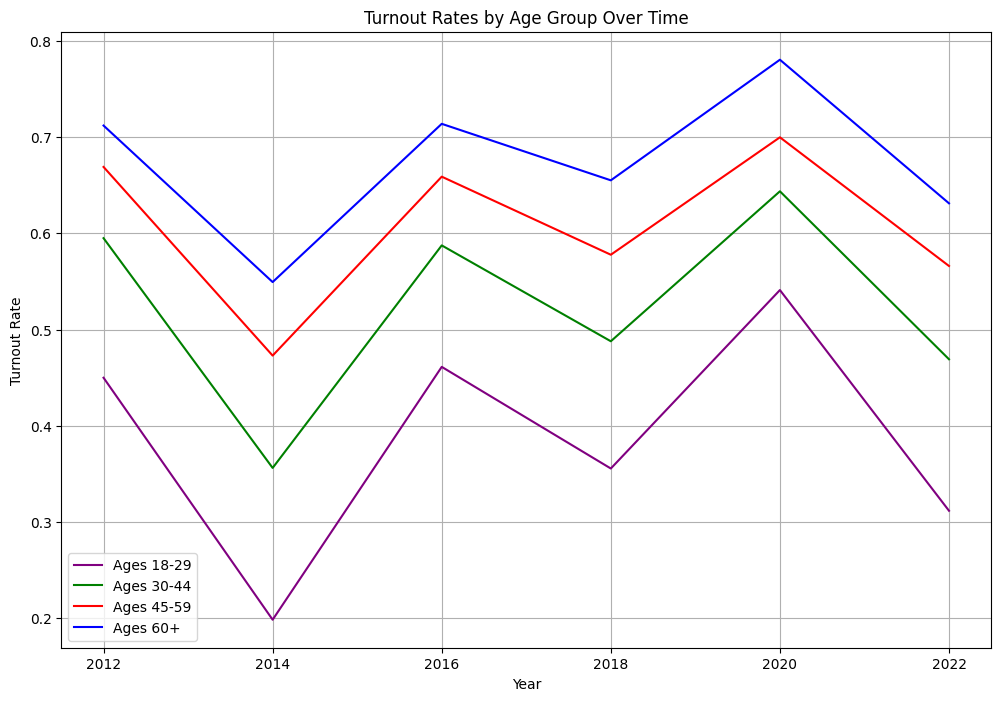

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_AGE1829_RATE'], label='Ages 18-29', color='purple')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_AGE3044_RATE'], label='Ages 30-44', color='green')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_AGE4559_RATE'], label='Ages 45-59', color='red')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_ADJ_AGE60_RATE'], label='Ages 60+', color='blue')
plt.title("Turnout Rates by Age Group Over Time")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


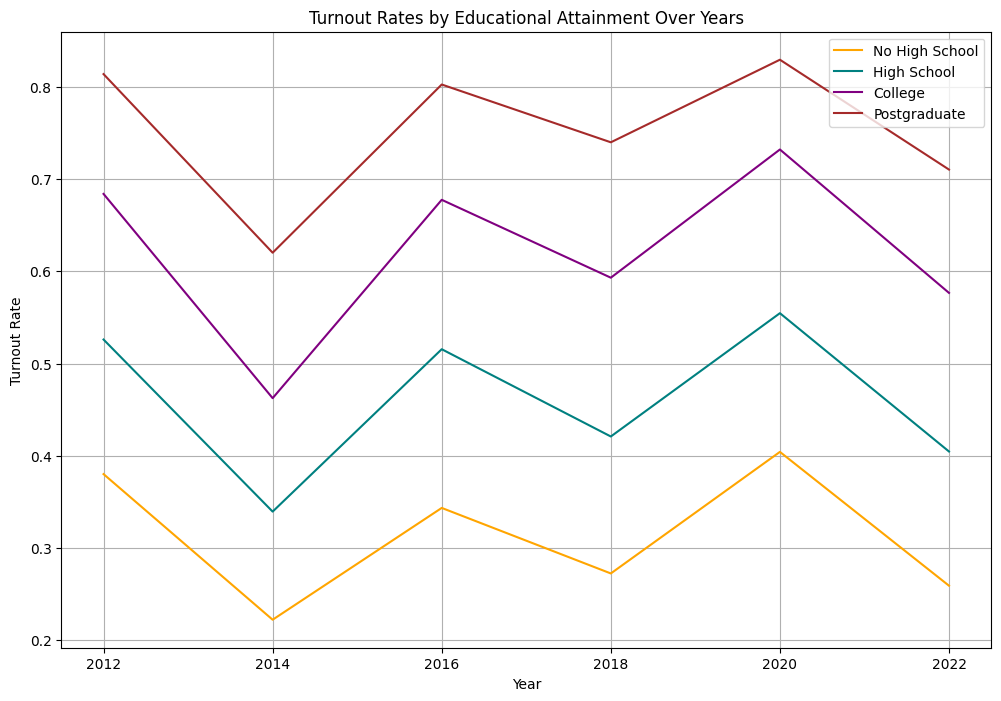

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_NOHS_RATE'], label='No High School', color='orange')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_HS_RATE'], label='High School', color='teal')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_COLLEGE_RATE'], label='College', color='purple')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_UNADJ_POST_RATE'], label='Postgraduate', color='brown')
plt.title("Turnout Rates by Educational Attainment Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
fl26_data_merged.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'district', 'stage', 'runoff', 'special', 'candidate',
       'party', 'writein', 'mode', 'candidatevotes', 'totalvotes',
       'unofficial', 'version', 'fusion_ticket', 'CPS_ADJ_NHWHITE_RATE',
       'CPS_ADJ_NHBLACK_RATE', 'CPS_ADJ_HISPANIC_RATE', 'CPS_ADJ_OTHER_RATE',
       'CPS_ADJ_NHWHITE_SHARE', 'CPS_ADJ_NHBLACK_SHARE',
       'CPS_ADJ_HISPANIC_SHARE', 'CPS_ADJ_OTHER_SHARE',
       'CPS_UNADJ_NHWHITE_RATE', 'CPS_UNADJ_NHBLACK_RATE',
       'CPS_UNADJ_HISPANIC_RATE', 'CPS_UNADJ_OTHER_RATE',
       'CPS_UNADJ_NHWHITE_SHARE', 'CPS_UNADJ_NHBLACK_SHARE',
       'CPS_UNADJ_HISPANIC_SHARE', 'CPS_UNADJ_OTHER_SHARE',
       'CPS_ADJ_AGE1829_RATE', 'CPS_ADJ_AGE3044_RATE', 'CPS_ADJ_AGE4559_RATE',
       'CPS_ADJ_AGE60_RATE', 'CPS_ADJ_AGE1829_SHARE', 'CPS_ADJ_AGE3044_SHARE',
       'CPS_ADJ_AGE4559_SHARE', 'CPS_ADJ_AGE60_SHARE',
       'CPS_UNADJ_AGE1829_RATE', 'CPS_UNADJ_AGE3044_RATE',
       'CPS_

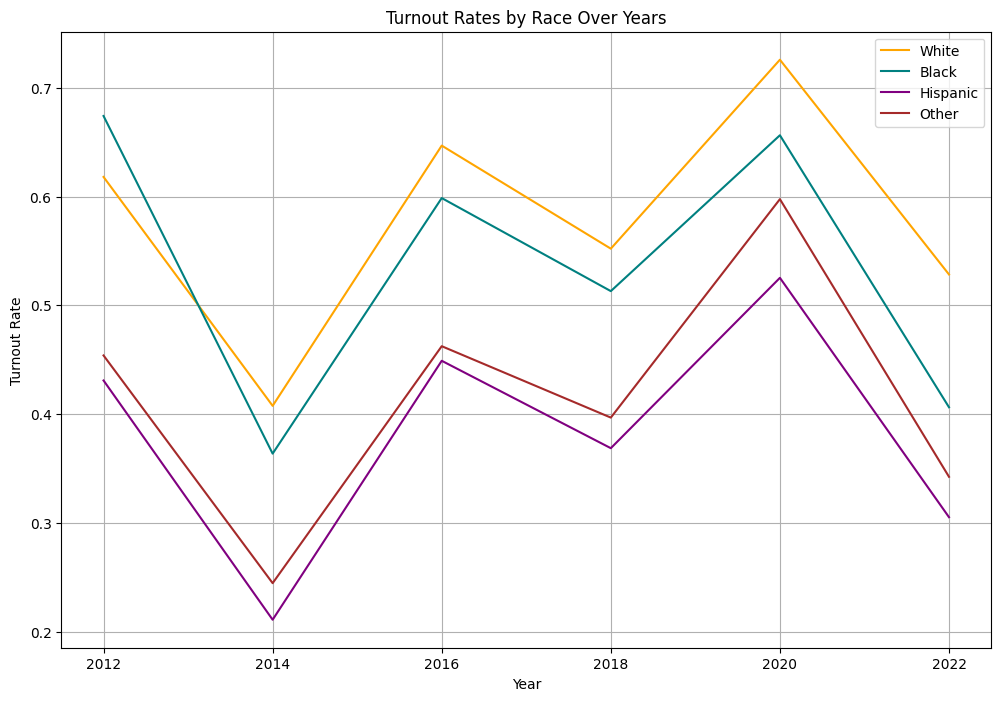

In [56]:
plt.figure(figsize=(12, 8))
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_ADJ_NHWHITE_RATE'], label='White', color='orange')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_ADJ_NHBLACK_RATE'], label='Black', color='teal')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_ADJ_HISPANIC_RATE'], label='Hispanic', color='purple')
plt.plot(fl26_data_merged['year'], fl26_data_merged['CPS_ADJ_OTHER_RATE'], label='Other', color='brown')
plt.title("Turnout Rates by Race Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
# Extract eligible voter data by age group for further analysis
eligible_voters = fl26_data_merged[['CPS_UNADJ_AGE1829_RATE','CPS_UNADJ_AGE3044_RATE','CPS_UNADJ_AGE4559_RATE','CPS_ADJ_AGE60_RATE']]
print(eligible_voters.describe())



       CPS_UNADJ_AGE1829_RATE  CPS_UNADJ_AGE3044_RATE  CPS_UNADJ_AGE4559_RATE  \
count               15.000000               15.000000               15.000000   
mean                 0.399887                0.537113                0.619073   
std                  0.107470                0.093807                0.075336   
min                  0.198600                0.356300                0.473000   
25%                  0.333750                0.478550                0.571950   
50%                  0.450000                0.587500                0.658900   
75%                  0.461300                0.595000                0.669000   
max                  0.541100                0.643700                0.699800   

       CPS_ADJ_AGE60_RATE  
count           15.000000  
mean             0.681440  
std              0.069574  
min              0.549400  
25%              0.643150  
50%              0.712000  
75%              0.713800  
max              0.780400  


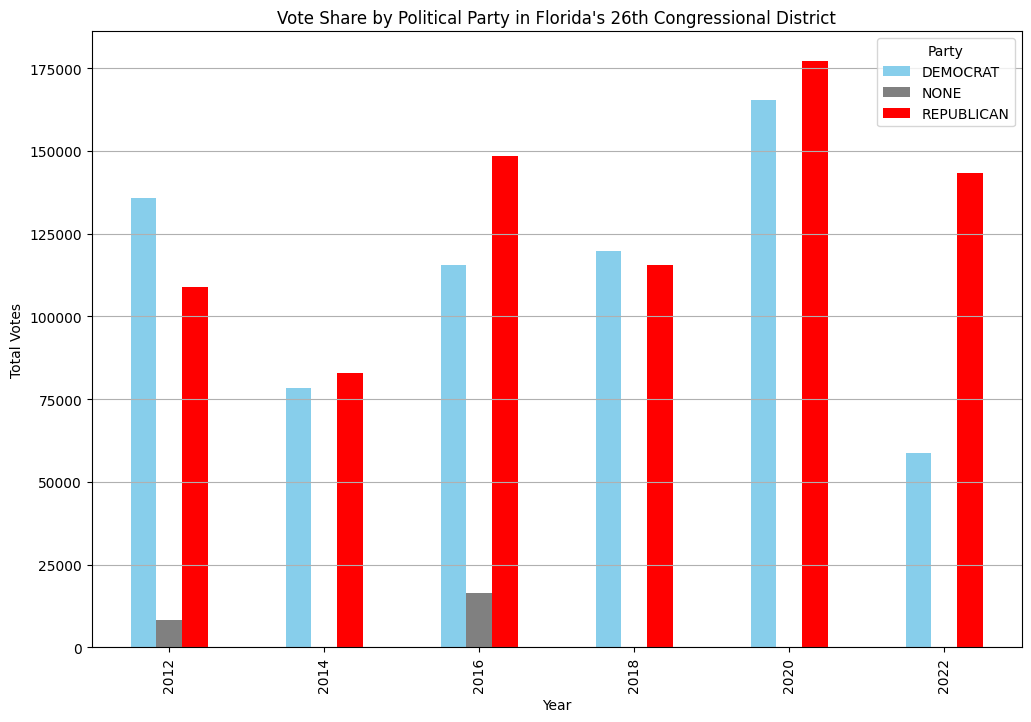

In [51]:
# Group data by year and party
party_votes = election_result_Florida.groupby(['year', 'party'])['candidatevotes'].sum().unstack()

# Define color mapping: red for Republicans, blue for Democrats, gray for others
party_colors = {'REPUBLICAN': 'red', 'DEMOCRAT': 'skyblue', 'OTHER': 'gray'}

# Plot the stacked bar chart
party_votes.plot(kind='bar', figsize=(12, 8), color=[party_colors.get(party, 'gray') for party in party_votes.columns])
plt.title("Vote Share by Political Party in Florida's 26th Congressional District")
plt.xlabel("Year")
plt.ylabel("Total Votes")
plt.legend(title="Party")
plt.grid(axis='y')
plt.show()


In [57]:
fl26_data_merged

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,...,CPS_UNADJ_NOHS_RATE,CPS_UNADJ_HS_RATE,CPS_UNADJ_COLLEGE_RATE,CPS_UNADJ_POST_RATE,CPS_UNADJ_NOHS_SHARE,CPS_UNADJ_HS_SHARE,CPS_UNADJ_COLLEGE_SHARE,CPS_UNADJ_POST_SHARE,TURNOUT_RATE_PRES,TURNOUT_RATE_MIDTERM
0,2012,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.3800,0.5260,0.6840,0.8140,0.0620,0.2590,0.5480,0.1310,0.5860,NaN
1,2012,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.3800,0.5260,0.6840,0.8140,0.0620,0.2590,0.5480,0.1310,0.5860,NaN
2,2012,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.3800,0.5260,0.6840,0.8140,0.0620,0.2590,0.5480,0.1310,0.5860,NaN
3,2012,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.3800,0.5260,0.6840,0.8140,0.0620,0.2590,0.5480,0.1310,0.5860,NaN
4,2014,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.2220,0.3393,0.4624,0.6202,0.0510,0.2413,0.5492,0.1585,NaN,0.3670
5,2014,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.2220,0.3393,0.4624,0.6202,0.0510,0.2413,0.5492,0.1585,NaN,0.3670
6,2016,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.3433,0.5155,0.6776,0.8027,0.0508,0.2456,0.5574,0.1462,0.6010,NaN
7,2016,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.3433,0.5155,0.6776,0.8027,0.0508,0.2456,0.5574,0.1462,0.6010,NaN
8,2016,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.3433,0.5155,0.6776,0.8027,0.0508,0.2456,0.5574,0.1462,0.6010,NaN
9,2018,FLORIDA,FL,12,59,43,US HOUSE,26,GEN,NaN,...,0.2722,0.4208,0.5931,0.7400,0.0422,0.2272,0.5654,0.1652,NaN,0.5005


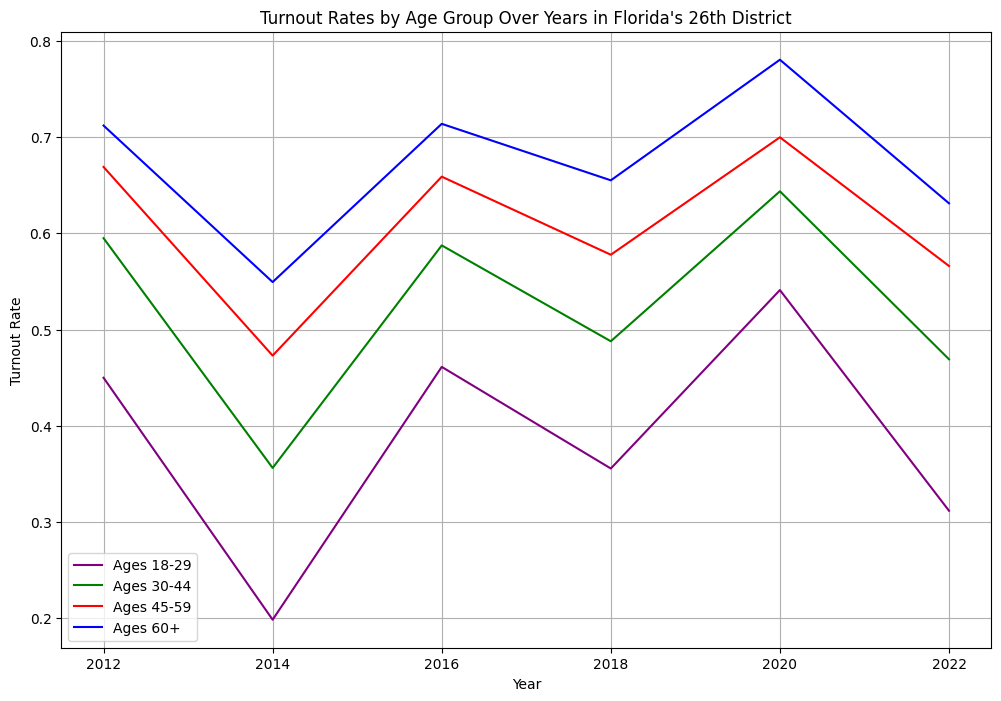

In [54]:
plt.figure(figsize=(12, 8))
plt.plot(election_result_Florida['year'], fl26_data_merged['CPS_UNADJ_AGE1829_RATE'], label='Ages 18-29', color='purple')
plt.plot(election_result_Florida['year'], fl26_data_merged['CPS_UNADJ_AGE3044_RATE'], label='Ages 30-44', color='green')
plt.plot(election_result_Florida['year'], fl26_data_merged['CPS_UNADJ_AGE4559_RATE'], label='Ages 45-59', color='red')
plt.plot(election_result_Florida['year'], fl26_data_merged['CPS_ADJ_AGE60_RATE'], label='Ages 60+', color='blue')
plt.title("Turnout Rates by Age Group Over Years in Florida's 26th District")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()
